# Model visualization

**Uses `torchview` Python package, which is *not* included in the `qcardia-models` requirements.**

The package uses Graphviz, which can require additional setup steps depending on operating system. For Windows, [Graphviz](https://www.graphviz.org/download/) might have to be installed on your machine, with a path to the program executable added to the Windows Path environment variable.

For more information and installation instructions, see their official GitHub: https://github.com/mert-kurttutan/torchview.


In [1]:
from pathlib import Path

import yaml
from torchview import draw_graph

from qcardia_models.models import EncoderMLP2d, UNet2d
from qcardia_models.models.building_blocks import Block, MultiLayerPerceptron

# U-Net

In [2]:
# get config dict from file
unet_config_path = Path("unet-config.yaml")
unet_config = yaml.load(unet_config_path.open(), Loader=yaml.FullLoader)

# 2D U-Net model
unet_model = UNet2d(
    nr_input_channels=unet_config["unet"]["nr_image_channels"],
    channels_list=unet_config["unet"]["channels_list"],
    nr_output_classes=unet_config["unet"]["nr_output_classes"],
    nr_output_scales=unet_config["unet"]["nr_output_scales"],
)

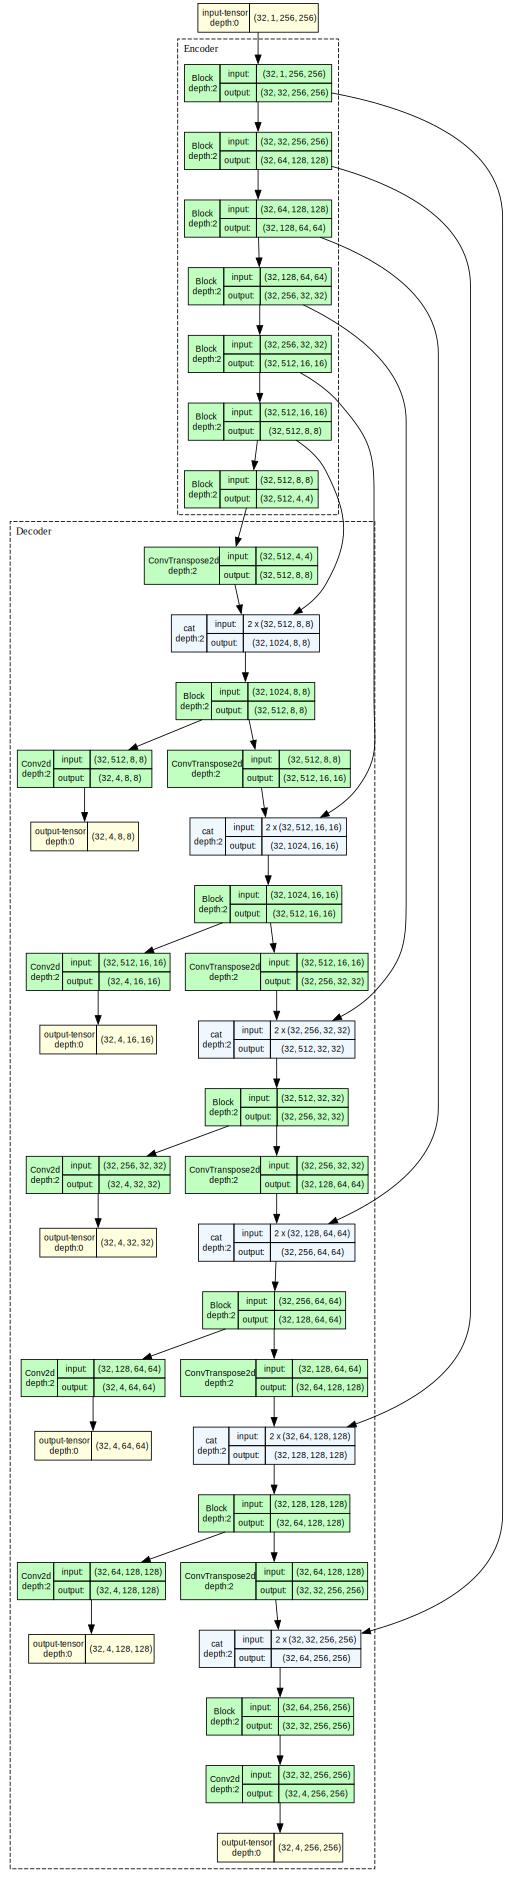

In [3]:
# input image shape
nr_input_channels = unet_config["unet"]["nr_image_channels"]
height, width = 256, 256
batch_size = 32
input_shape = (batch_size, nr_input_channels, height, width)

model_graph = draw_graph(
    unet_model,
    input_size=input_shape,
    graph_name="U-Net",
    device="meta",
    depth=2,
    expand_nested=True,
)
# set font, availability might be OS dependent
model_graph.visual_graph.node_attr["fontname"] = "Helvetica"
model_graph.visual_graph

# Block

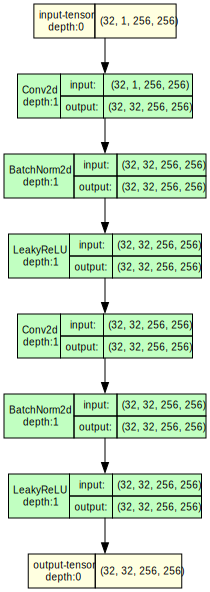

In [4]:
block = Block(
    input_channels=unet_config["unet"]["nr_image_channels"],
    output_channels=unet_config["unet"]["channels_list"][0],
)

model_graph = draw_graph(
    block, input_size=input_shape, graph_name="Block", device="meta"
)
# set font, availability might be OS dependent
model_graph.visual_graph.node_attr["fontname"] = "Helvetica"
model_graph.visual_graph

# Encoder + MLP

In [5]:
# get config dict from file
encodermlp_config_path = Path("encodermlp-config.yaml")
encodermlp_config = yaml.load(encodermlp_config_path.open(), Loader=yaml.FullLoader)

# 2D Encoder-MLP model
encodermlp_model = EncoderMLP2d(
    nr_input_channels=encodermlp_config["encoder"]["nr_image_channels"],
    encoder_channels_list=encodermlp_config["encoder"]["channels_list"],
    mlp_channels_list=encodermlp_config["mlp"]["channels_list"],
)

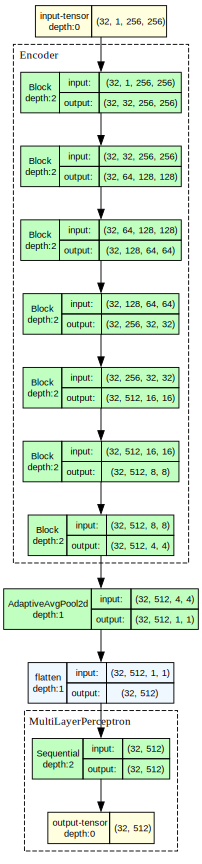

In [6]:
# input image shape
nr_input_channels = encodermlp_config["encoder"]["nr_image_channels"]
height, width = 256, 256
batch_size = 32
input_shape = (batch_size, nr_input_channels, height, width)

model_graph = draw_graph(
    encodermlp_model,
    input_size=input_shape,
    graph_name="EncoderMLP",
    device="meta",
    depth=2,
    expand_nested=True,
)
# set font, availability might be OS dependent
model_graph.visual_graph.node_attr["fontname"] = "Helvetica"
model_graph.visual_graph

# MLP

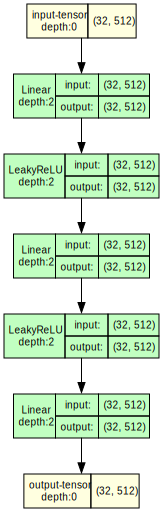

In [7]:
mlp = MultiLayerPerceptron(
    input_feature_size=encodermlp_config["encoder"]["channels_list"][-1],
    output_feature_size_list=encodermlp_config["mlp"]["channels_list"],
)

# shape of flattened encoder output after average pooling
feature_shape = (batch_size, encodermlp_config["encoder"]["channels_list"][-1])

model_graph = draw_graph(mlp, input_size=feature_shape, graph_name="MLP", device="meta")
# set font, availability might be OS dependent
model_graph.visual_graph.node_attr["fontname"] = "Helvetica"
model_graph.visual_graph